In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
#Reading data file
df = pd.read_csv('Car_Mileage.csv')

In [4]:
df.head()

,Cylinders,Power,Weight,CC,Mileage,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,3,60,600,870,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,63,606,874,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,66,612,879,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,69,618,883,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,73,624,888,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Deleting Unnecessary Columns
df.drop(df.iloc[:,5:], axis = 1, inplace = True)
df.head()

,Cylinders,Power,Weight,CC,Mileage
0,3,60,600,870,12
1,3,63,606,874,11
2,3,66,612,879,10
3,3,69,618,883,9
4,4,73,624,888,8


In [6]:
df.shape

(30, 5)

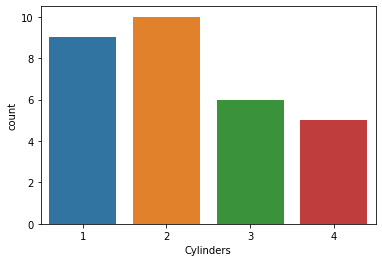

In [7]:
sns.countplot(x = df['Cylinders'])

E:\New folder (2)\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


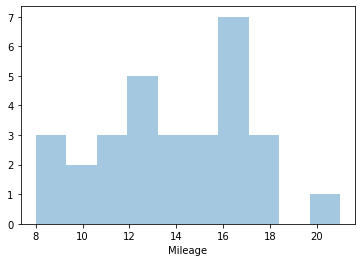

In [8]:
sns.distplot(df['Mileage'],kde = False, bins = 10)

E:\New folder (2)\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


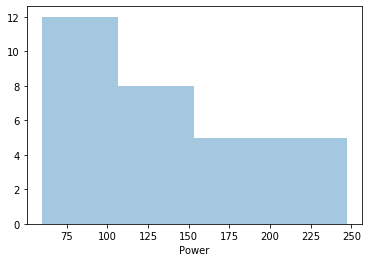

In [9]:
sns.distplot(df['Power'],kde = False)

E:\New folder (2)\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


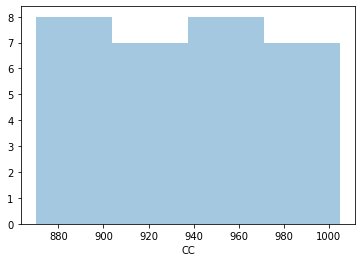

In [10]:
sns.distplot(df['CC'],kde = False)

E:\New folder (2)\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


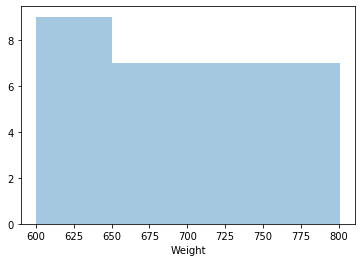

In [11]:
sns.distplot(df['Weight'],kde = False)

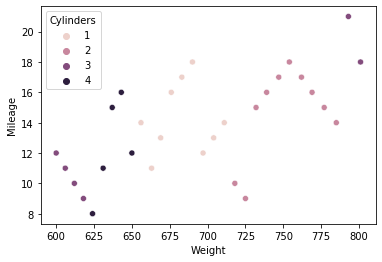

In [12]:
sns.scatterplot(x =df['Weight'], y= df['Mileage'],hue = df['Cylinders'])

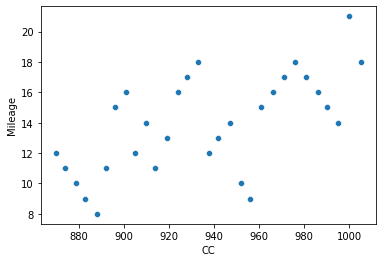

In [13]:
sns.scatterplot(x =df['CC'], y= df['Mileage'])

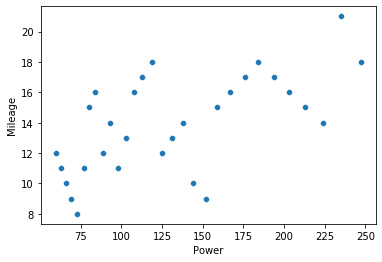

In [14]:
sns.scatterplot(x =df['Power'], y= df['Mileage'])

In [16]:
df.iloc[:,0].head()

0    3
1    3
2    3
3    3
4    4
Name: Cylinders, dtype: int64

In [17]:
X_new = pd.get_dummies(df.iloc[:,0], drop_first=True)

In [18]:
X_new.head()

,2,3,4
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [19]:
df = pd.concat([X_new, df],axis = 1)

In [20]:
df.head()

,2,3,4,Cylinders,Power,Weight,CC,Mileage
0,0,1,0,3,60,600,870,12
1,0,1,0,3,63,606,874,11
2,0,1,0,3,66,612,879,10
3,0,1,0,3,69,618,883,9
4,0,0,1,4,73,624,888,8


In [21]:
df.shape

(30, 8)

In [23]:
df.corr()

,2,3,4,Cylinders,Power,Weight,CC,Mileage
2,1.000000,-0.353553,-0.316228,-0.156447,0.624562,0.650118,0.653892,0.170901
3,-0.353553,1.000000,-0.223607,0.363480,-0.086755,-0.200911,-0.217562,-0.068304
4,-0.316228,-0.223607,1.000000,0.749159,-0.424207,-0.438549,-0.439405,-0.216175
Cylinders,-0.156447,0.363480,0.749159,1.000000,-0.236351,-0.326727,-0.338579,-0.204595
Power,0.624562,-0.086755,-0.424207,-0.236351,1.000000,0.989365,0.986252,0.620704
Weight,0.650118,-0.200911,-0.438549,-0.326727,0.989365,1.000000,0.999758,0.623276
CC,0.653892,-0.217562,-0.439405,-0.338579,0.986252,0.999758,1.000000,0.623428
Mileage,0.170901,-0.068304,-0.216175,-0.204595,0.620704,0.623276,0.623428,1.000000


In [25]:
df.drop(['Cylinders'], axis = 1, inplace = True)

In [26]:
df.head()

,2,3,4,Power,Weight,CC,Mileage
0,0,1,0,60,600,870,12
1,0,1,0,63,606,874,11
2,0,1,0,66,612,879,10
3,0,1,0,69,618,883,9
4,0,0,1,73,624,888,8


In [52]:
# Dependent variable 

X = df.iloc[:,[0,1,2,3,4,5]].values
#X = X.reshape(-1,1)
# Independent variable 

y = df.iloc[:,6].values

In [53]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [54]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [55]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

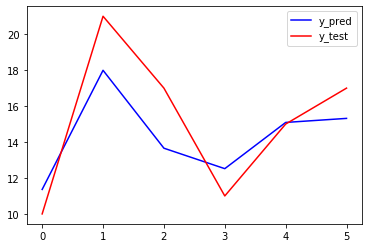

In [56]:
# Visualizing the result
plt.plot(range(6),y_pred,'b',label = 'y_pred')
plt.plot(range(6),y_test, 'r',label = 'y_test')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(regressor.coef_)
print(regressor.intercept_)
print(mse)

[-1.08089155e+00  4.99350791e-02  1.40353136e-01  5.80119371e+00
 -5.35754784e+01  5.02457689e+01]
13.624999999999984
4.5380201193171965


In [38]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     4.910
Date:                Tue, 06 Oct 2020   Prob (F-statistic):            0.00310
Time:                        19:21:04   Log-Likelihood:                -66.632
No. Observations:                  30   AIC:                             145.3
Df Residuals:                      24   BIC:                             153.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -461.5411    457.553     -1.009      0.3

In [60]:
a = [[0,1,0,60,600,870]]
a =sc_X.transform(a)
#

In [61]:
X_train[0]

array([ 1.41421356, -0.4472136 , -0.51298918,  1.86340506,  1.64653727,
        1.60669711])

In [63]:
y_pred = regressor.predict(a)

In [64]:
y_pred

array([10.23545759])